In [1]:
###Run this code to create a JSON file that diables auto-quotes and auto-brackets. After executing the Python 
#command, or manually creating the file, restart your Jupyter notebook, and it should stop auto-closing quotes
#and brackets.

#from notebook.services.config import ConfigManager
#c = ConfigManager()
#c.update('notebook', {"CodeCell": {"cm_config": {"autoCloseBrackets": False}}})

###Keyboard Shortcuts
#Ctrl + Enter: Run single cell of code (similar to R)
#Ctrl + Shift + Enter: Run entire notebook (similar to R)

In [2]:
#Intro to Web Scraping and BeautifulSoup
#https://www.youtube.com/watch?v=XQgXKtPSzUI

#exporting to excel
#df.to_excel("excel_file_name.xlsx")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
#import re #for splitting strings using multiple delimiters
import time
import random

premiers = []
genres = []
scores = []

In [3]:
#Reading in raw export file from MAL
df0 = pd.read_excel('list.xlsx')

#Removing unnecessary extra columns
columns = [11,14,19,21,23,25,26]
df = df0.iloc[:,columns]

#Renaming column names
df = df.rename(columns={'/anime/my_score':'myscore','/anime/my_status':'status','/anime/my_watched_episodes':'watched', \
                        '/anime/series_animedb_id':'id','/anime/series_episodes':'episodes', \
                        '/anime/series_title':'title','/anime/series_type':'type'})
df

,myscore,status,watched,id,episodes,title,type
0,7,Completed,12,38101,12,5-toubun no Hanayome,TV
1,5,Completed,12,36039,12,A.I.C.O.: Incarnation,ONA
2,8,Completed,10,36904,10,Aggressive Retsuko (ONA),ONA
3,8,Completed,10,37985,10,Aggressive Retsuko (ONA) 2nd Season,ONA
4,0,Plan to Watch,0,40215,0,Aggressive Retsuko (ONA) 3rd Season,ONA
...,...,...,...,...,...,...,...
260,0,Plan to Watch,0,35507,12,Youkoso Jitsuryoku Shijou Shugi no Kyoushitsu ...,TV
261,0,Dropped,4,18677,12,Yuusha ni Narenakatta Ore wa Shibushibu Shuush...,TV
262,7,Completed,12,34176,12,Zero kara Hajimeru Mahou no Sho,TV
263,8,Completed,12,37976,12,Zombieland Saga,TV


In [4]:
"""
#Creating complete df

#Open pages to scrape more data about shows
for i in range(len(df)): #number of rows of df
    #wait random time between 0-5 seconds before scraping data
    r = random.randint(0,5)
    time.sleep(r)

    URL = 'https://myanimelist.net/anime/%d/' % df.loc[i,'id']
    page = urlopen(URL)
    soup = BeautifulSoup(page,'html.parser')
    #finding all span-dark_text containers i.e. bolded text on left
    containers = soup.findAll('span',attrs={'class':'dark_text'})

    
    ####Getting container indecies
    #'Premiered' for type TV, 'Aired' for non-TV types
    if df.loc[i,'type'] == 'TV':
        keyword = 'Premiered'
        #outputs of this form 'Premiered:\nFall 2017'
        omit_start = 11 #omitting 'Premiered:\n'
    else:
        keyword = 'Aired'
        #outputs of this form 'Aired:\n Dec 10, 2005'
        omit_start = 9 #omitting 'Premiered:\n '

    #Extracts title texts and looks for index_container for Premiered or Aired
    for t in range(len(containers)):
        if keyword in containers[t].text:
            index_container_premiered = t
            break #breaks out of t loop once index found
        if t == len(containers):
            #if no index found 
            print('No index for index_container_premiered')
               
    #Extracts title texts and looks for index_container for Genre
    for t in range(len(containers)):
        if 'Genres' in containers[t].text:
            index_container_genre = t
            break #breaks out of t loop once index found
        if t == len(containers):
            #if no index found 
            print('No index for index_container_genre')

    #Extracts title texts and looks for index_container for Score
    for t in range(len(containers)):
        if 'Score' in containers[t].text:
            index_container_score = t
            break #breaks out of t loop once index found
        if t == len(containers):
            #if no index found 
            print('No index for index_container_score')
            
    ####Looks at parent object for easy access to div container much easier than findAll('div')
    premier = containers[index_container_premiered].parent.text.strip() #outputs of this form: see above
    premier = premier[omit_start:] #omitting see above
    premiers = premiers + [premier]

    container_parent = containers[index_container_genre].parent
    list_genres = container_parent.findAll('span')
    genre = []
    for g in list_genres[1:]: #exlcuding the first span object, which is the text 'Genres:'
        genre = genre + [g.text]
    genres = genres + [genre]

    score = containers[index_container_score].parent.text.strip() #outputs of this form: see above
    score = score[7:12] #only extracting float X.XXX
    scores = scores + [score]
    
    
df['premiered'] = premiers
df['genres'] = genres
df['score'] = scores
df
#df.to_excel("df.xlsx")
"""

'\n#Creating complete df\n\n#Open pages to scrape more data about shows\nfor i in range(len(df)): #number of rows of df\n    #wait random time between 0-5 seconds before scraping data\n    r = random.randint(0,5)\n    time.sleep(r)\n\n    URL = \'https://myanimelist.net/anime/%d/\' % df.loc[i,\'id\']\n    page = urlopen(URL)\n    soup = BeautifulSoup(page,\'html.parser\')\n    #finding all span-dark_text containers i.e. bolded text on left\n    containers = soup.findAll(\'span\',attrs={\'class\':\'dark_text\'})\n\n    \n    ####Getting container indecies\n    #\'Premiered\' for type TV, \'Aired\' for non-TV types\n    if df.loc[i,\'type\'] == \'TV\':\n        keyword = \'Premiered\'\n        #outputs of this form \'Premiered:\nFall 2017\'\n        omit_start = 11 #omitting \'Premiered:\n\'\n    else:\n        keyword = \'Aired\'\n        #outputs of this form \'Aired:\n Dec 10, 2005\'\n        omit_start = 9 #omitting \'Premiered:\n \'\n\n    #Extracts title texts and looks for index_c

In [5]:
#Converting exported df back into correct format
df = pd.read_excel('df.xlsx')
df = df.drop(columns='Unnamed: 0') #removing column of indecies

#When exporting, genres entries got converted from list type to string
#Converting string representation of list to list type, string to float
import ast
genres = []
for i in range(len(df)):
    ini_list = df.loc[i,'genres']
    res = ast.literal_eval(ini_list) # Converting string to list 
    genres = genres + [res]
df['genres'] = genres

#When exporting, score entries got converted from float to string
#Converting string to float
df['score'] = pd.to_numeric(df['score'],errors='coerce') #'coerce' option turns non-floats into NAs

df

,myscore,status,watched,id,episodes,title,type,premiered,genres,score
0,7,Completed,12,38101,12,5-toubun no Hanayome,TV,Winter 2019,"[Harem, Comedy, Romance, School, Shounen]",7.641
1,5,Completed,12,36039,12,A.I.C.O.: Incarnation,ONA,"Mar 9, 2018","[Action, Sci-Fi]",6.771
2,8,Completed,10,36904,10,Aggressive Retsuko (ONA),ONA,"Apr 20, 2018","[Slice of Life, Comedy]",7.791
3,8,Completed,10,37985,10,Aggressive Retsuko (ONA) 2nd Season,ONA,"Jun 14, 2019","[Slice of Life, Comedy]",7.871
4,0,Plan to Watch,0,40215,0,Aggressive Retsuko (ONA) 3rd Season,ONA,Not available,"[Comedy, Slice of Life]",NaN
...,...,...,...,...,...,...,...,...,...,...
260,0,Plan to Watch,0,35507,12,Youkoso Jitsuryoku Shijou Shugi no Kyoushitsu ...,TV,Summer 2017,"[Slice of Life, Psychological, Drama, School]",7.911
261,0,Dropped,4,18677,12,Yuusha ni Narenakatta Ore wa Shibushibu Shuush...,TV,Fall 2013,"[Comedy, Romance, Ecchi, Fantasy]",6.991
262,7,Completed,12,34176,12,Zero kara Hajimeru Mahou no Sho,TV,Spring 2017,"[Action, Adventure, Magic, Fantasy]",7.171
263,8,Completed,12,37976,12,Zombieland Saga,TV,Fall 2018,"[Comedy, Music, Supernatural]",7.641


In [6]:
#df subset - Only looking at scored series
DFA = df.loc[df['myscore'] > 0]
DFA = DFA.reset_index(drop=True) #reset df indecies
DFA

,myscore,status,watched,id,episodes,title,type,premiered,genres,score
0,7,Completed,12,38101,12,5-toubun no Hanayome,TV,Winter 2019,"[Harem, Comedy, Romance, School, Shounen]",7.641
1,5,Completed,12,36039,12,A.I.C.O.: Incarnation,ONA,"Mar 9, 2018","[Action, Sci-Fi]",6.771
2,8,Completed,10,36904,10,Aggressive Retsuko (ONA),ONA,"Apr 20, 2018","[Slice of Life, Comedy]",7.791
3,8,Completed,10,37985,10,Aggressive Retsuko (ONA) 2nd Season,ONA,"Jun 14, 2019","[Slice of Life, Comedy]",7.871
4,8,Completed,1,38815,1,Aggressive Retsuko: We Wish You a Metal Christmas,ONA,"Dec 20, 2018","[Slice of Life, Comedy]",7.341
...,...,...,...,...,...,...,...,...,...,...
171,8,Completed,12,37779,12,Yakusoku no Neverland,TV,Winter 2019,"[Sci-Fi, Mystery, Horror, Psychological, Thril...",8.691
172,8,Completed,12,32615,12,Youjo Senki,TV,Winter 2017,"[Action, Military, Magic]",8.091
173,8,Completed,1,37055,1,Youjo Senki Movie,Movie,"Feb 8, 2019","[Action, Magic, Military]",8.391
174,7,Completed,12,34176,12,Zero kara Hajimeru Mahou no Sho,TV,Spring 2017,"[Action, Adventure, Magic, Fantasy]",7.171


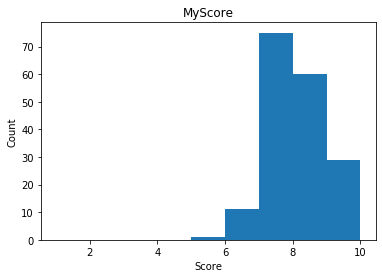

MyScore Mean: 7.631
MyScore St. Dev.: 0.926


In [98]:
#MyScore distribution
a = DFA.loc[:,'myscore']
plt.hist(a,bins=range(1,11))
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('MyScore')
plt.show()

print('MyScore Mean: %.3f' % np.mean(a))
print('MyScore St. Dev.: %.3f' % np.std(a))

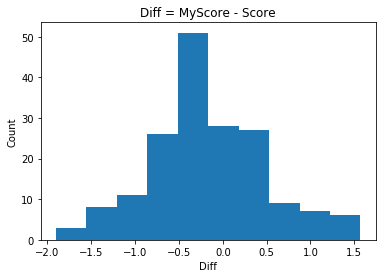

In [99]:
#Score Difference distribution
scores_diff = DFA.loc[:,'myscore'] - DFA.loc[:,'score']
plt.hist(scores_diff)
plt.xlabel('Diff')
plt.ylabel('Count')
plt.title('Diff = MyScore - Score')
plt.show()

DFA['diff'] = scores_diff

In [82]:
#Genre distribution
names_genre = ['Action','Adventure','Cars','Comedy','Dementia','Demons','Drama','Ecchi','Fantasy','Game','Harem', \
              'Hentai','Historical','Horror','Josei','Kids','Magic','Martial Arts','Mecha','Military','Music', \
              'Mystery','Parody','Police','Psychological','Romance','Samurai','School','Sci-Fi','Seinen','Shoujo', \
              'Shoujo Ai','Shounen','Shounen Ai','Slice of Life','Space','Sports','Super Power','Supernatural', \
              'Thriller','Vampire','Yaoi','Yuri']
len(names_genre)

#create a list of genre & myscore pairs
list_genre_pairs = [ [DFA.loc[j,'myscore'],i] for j in range(len(DFA)) for i in DFA['genres'][j]]
#initalize a list of list of genre scores
scores_genre = [ [] for i in range(len(names_genre))]

#
for i in range(len(list_genre_pairs)):
    index  = names_genre.index(list_genre_pairs[i][1])
    scores_genre[index] = scores_genre[index] + [list_genre_pairs[i][0]]

    
mean_score_genre = [np.mean(i) for i in scores_genre]
count_score_genre = [len(i) for i in scores_genre]

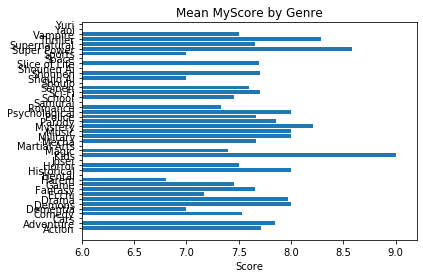

In [107]:
plt.barh(names_genre,mean_score_genre)
plt.xlabel('Score')
plt.xlim(6,9.2)
plt.title('Mean MyScore by Genre')
plt.show()

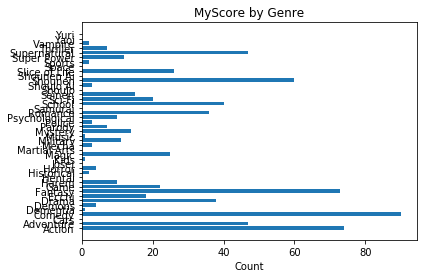

In [100]:
plt.barh(names_genre,count_score_genre)
plt.xlabel('Count')
plt.title('MyScore by Genre')
plt.show()